/var/folders/b2/1dk5_g9d449_swwl06t8hhjm0000gn/T/ipykernel_22073/277908577.py:18: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  stock_data[column] = stock_data[column].str.replace('$', '').astype(float)


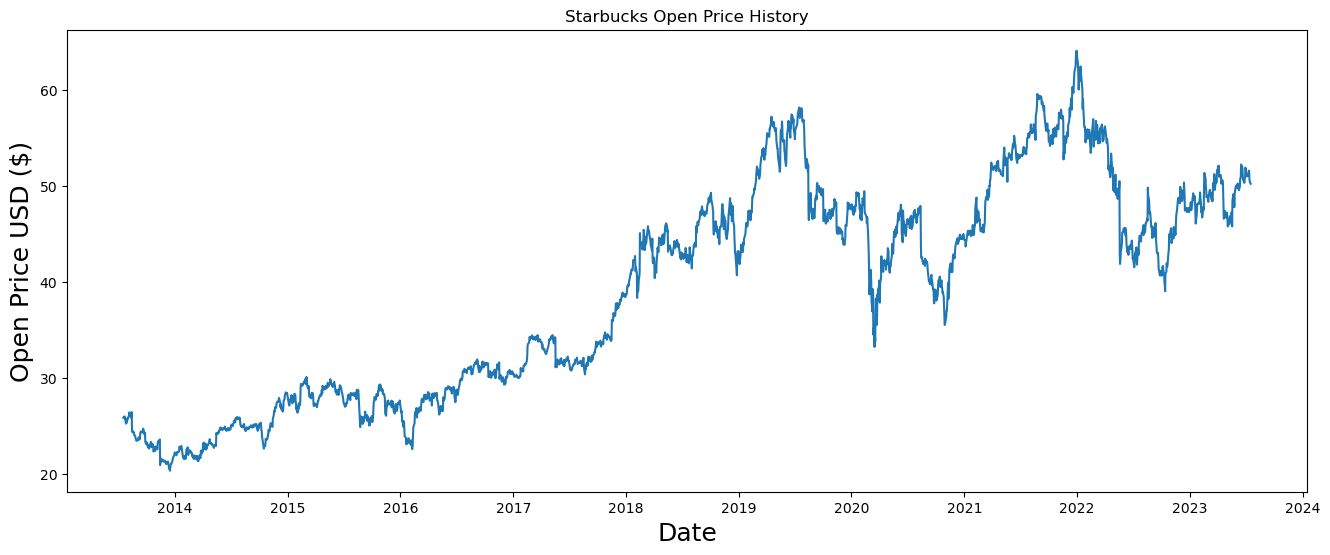

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2516 entries, 10063 to 7548
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   Company     2516 non-null   object        
 1   Date        2516 non-null   datetime64[ns]
 2   Close/Last  2516 non-null   float64       
 3   Volume      2516 non-null   int64         
 4   Open        2516 non-null   float64       
 5   High        2516 non-null   float64       
 6   Low         2516 non-null   float64       
dtypes: datetime64[ns](1), float64(4), int64(1), object(1)
memory usage: 157.2+ KB


39.0762529809221

In [7]:
# %%
# Import the modules
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense, LSTM
from keras.layers import Dropout
import tensorflow as tf 

# %%
# Read the csv file and clean the data
stock_data = pd.read_csv('Resources/data.csv')
stock_data['Date'] = pd.to_datetime(stock_data['Date'], errors='coerce')
price_columns = ['Close/Last', 'Open', 'High', 'Low']
for column in price_columns:
    stock_data[column] = stock_data[column].str.replace('$', '').astype(float)
CSCO_data = stock_data[stock_data['Company'] == 'CSCO']
CSCO_data = CSCO_data.sort_values(by="Date")
CSCO_data.head()

# %%
# Plotting the close price history
plt.figure(figsize=(16,6))
plt.title('Starbucks Open Price History')
plt.plot(CSCO_data['Date'], CSCO_data['Open'])
plt.xlabel('Date', fontsize=18)
plt.ylabel('Open Price USD ($)', fontsize=18)
plt.show()

# %%
CSCO_data.isna().any()

# %%
CSCO_data.tail(10)

# %%
CSCO_data.describe()

# %%
CSCO_data.info()

# %%
CSCO_data.isnull().sum()

# %%
# Split training and testing datasets

df_test = CSCO_data.tail(40)
CSCO_df = CSCO_data.iloc[::-1]

# %%
CSCO_df['Open'].mean()

/var/folders/b2/1dk5_g9d449_swwl06t8hhjm0000gn/T/ipykernel_22073/173235451.py:8: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(2,3,i+1)
/var/folders/b2/1dk5_g9d449_swwl06t8hhjm0000gn/T/ipykernel_22073/173235451.py:9: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sb.distplot(CSCO_data[col])
/var/folders/b2/1dk5_g9d449_swwl06t8hhjm0000gn/T/ipykernel_22073/173235451.py:9: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-

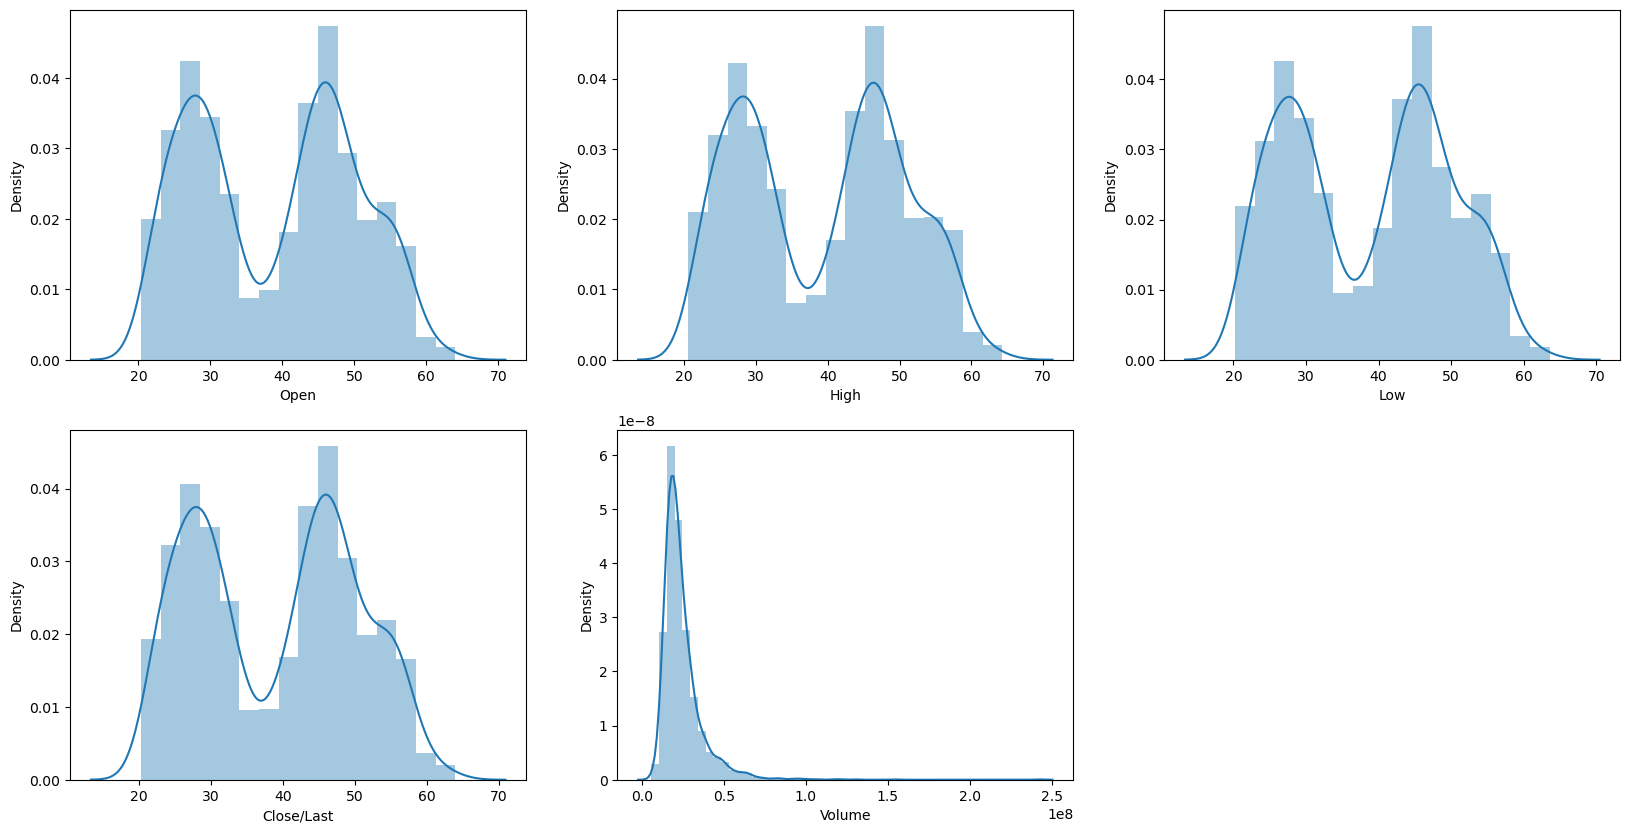

In [8]:
# %%
import seaborn as sb
features = ['Open', 'High', 'Low', 'Close/Last', 'Volume']
 
plt.subplots(figsize=(20,10))
 
for i, col in enumerate(features):
  plt.subplot(2,3,i+1)
  sb.distplot(CSCO_data[col])
plt.show()

In [9]:

# %%
CSCO_data.describe()

# %%
CSCO_data


,Company,Date,Close/Last,Volume,Open,High,Low
10063,CSCO,2013-07-18,25.86,32989780,25.87,26.1500,25.7300
10062,CSCO,2013-07-19,25.82,38798190,25.86,26.0000,25.6200
10061,CSCO,2013-07-22,25.72,30419590,26.00,26.0400,25.4800
10060,CSCO,2013-07-23,25.56,27952850,25.70,25.7700,25.4900
10059,CSCO,2013-07-24,25.59,27329230,25.84,25.9900,25.4500
...,...,...,...,...,...,...,...
7552,CSCO,2023-07-11,52.12,15002730,51.57,52.1475,51.5400
7551,CSCO,2023-07-12,50.74,26332530,51.56,51.9300,50.5319
7550,CSCO,2023-07-13,51.53,17864780,50.69,51.6200,50.6500
7549,CSCO,2023-07-14,50.38,19566590,50.42,50.9700,50.0550


/var/folders/b2/1dk5_g9d449_swwl06t8hhjm0000gn/T/ipykernel_22073/1328475724.py:22: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  data_grouped = CSCO_data.groupby('year').mean()
/var/folders/b2/1dk5_g9d449_swwl06t8hhjm0000gn/T/ipykernel_22073/1328475724.py:26: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(2,2,i+1)


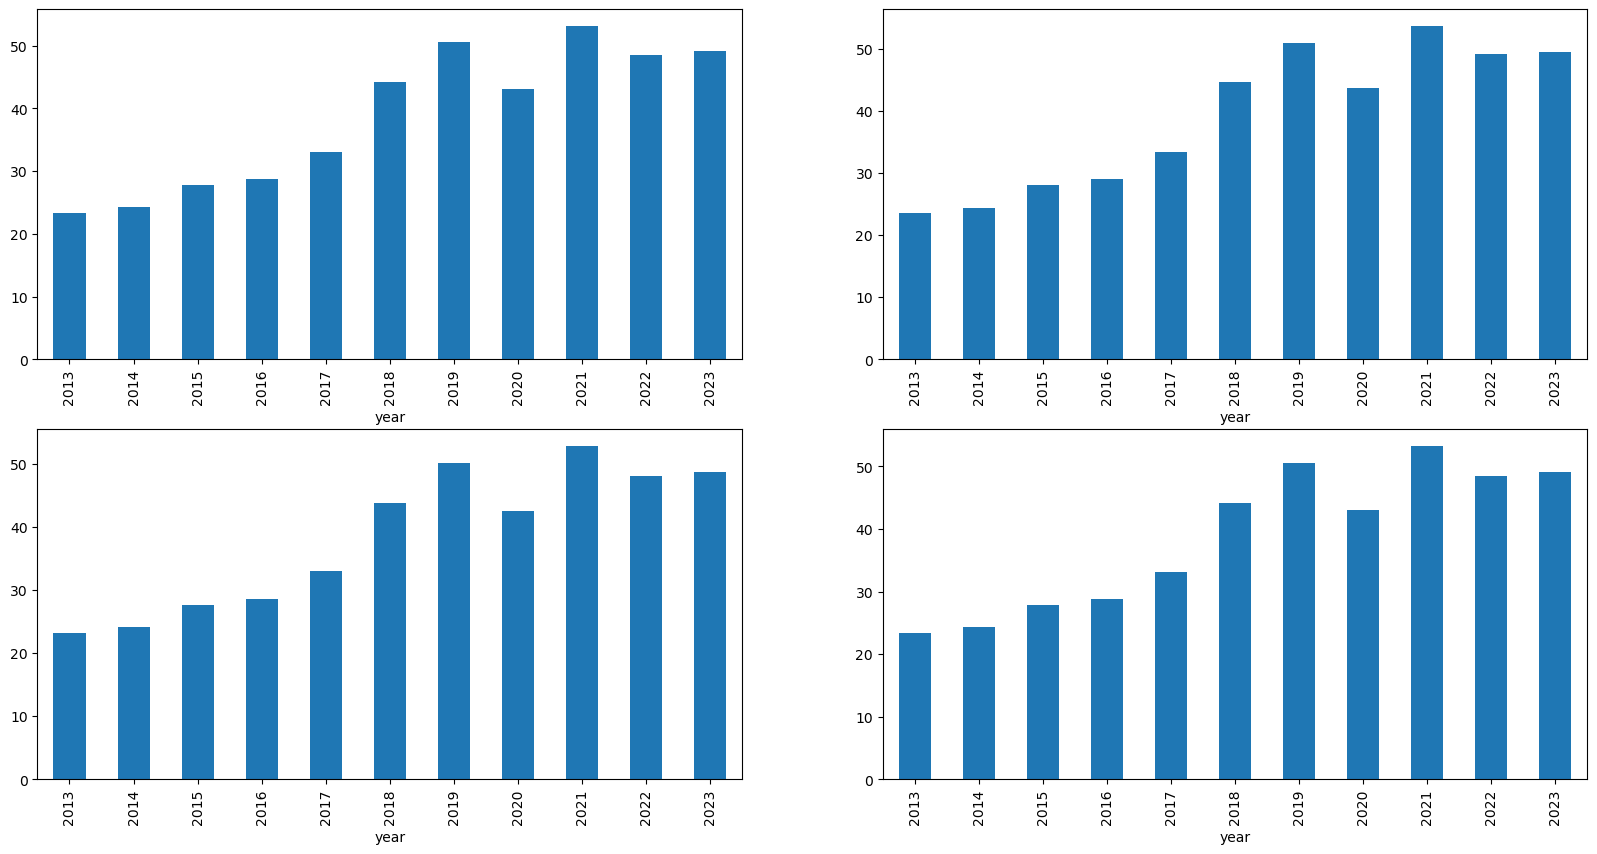

/var/folders/b2/1dk5_g9d449_swwl06t8hhjm0000gn/T/ipykernel_22073/1328475724.py:31: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  CSCO_data.groupby('is_quarter_end').mean()


<Figure size 1000x1000 with 0 Axes>

<Figure size 1000x1000 with 0 Axes>

In [10]:

# %%
CSCO_data["Date"] = CSCO_data["Date"].astype(str) 
splitted = CSCO_data['Date'].str.split('-', expand=True)
 
CSCO_data['day'] = splitted[2].astype('int')
CSCO_data['month'] = splitted[1].astype('int')
CSCO_data['year'] = splitted[0].astype('int')
 
CSCO_data.head()

# %%
CSCO_data.tail(5)

# %%
CSCO_data.isnull().sum()

# %%
CSCO_data['is_quarter_end'] = np.where(CSCO_data['month']%3==0,1,0)
CSCO_data.head()

# %%
data_grouped = CSCO_data.groupby('year').mean()
plt.subplots(figsize=(20,10))
 
for i, col in enumerate(['Open', 'High', 'Low', 'Close/Last']):
  plt.subplot(2,2,i+1)
  data_grouped[col].plot.bar()
plt.show()

# %%
CSCO_data.groupby('is_quarter_end').mean()

# %%
CSCO_data['open-close']  = CSCO_data['Open'] - CSCO_data['Close/Last']
CSCO_data['low-high']  = CSCO_data['Low'] - CSCO_data['High']
CSCO_data['target'] = np.where(CSCO_data['Close/Last'].shift(-1) > CSCO_data['Close/Last'], 1, 0)
plt.figure(figsize=(10, 10))


In [11]:
# %%
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
features = CSCO_data[['open-close', 'low-high', 'is_quarter_end']]
target = CSCO_data['target']
 
scaler = StandardScaler()
features = scaler.fit_transform(features)
 
X_train, X_valid, Y_train, Y_valid = train_test_split(
    features, target, test_size=0.1, random_state=2022)
print(X_train.shape, X_valid.shape)

(2264, 3) (252, 3)


In [16]:

# %%
from xgboost import XGBClassifier
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.svm import SVC

# %%
models = [LogisticRegression(), SVC(
  kernel='poly', probability=True), XGBClassifier()]
 
for i in range(3):
  models[i].fit(X_train, Y_train)
 
  print(f'{models[i]} : ')
  print('Training Accuracy : ', metrics.roc_auc_score(
    Y_train, models[i].predict_proba(X_train)[:,1]))
  print('Validation Accuracy : ', metrics.roc_auc_score(
    Y_valid, models[i].predict_proba(X_valid)[:,1]))
  print()

LogisticRegression() : 
Training Accuracy :  0.517419898371889
Validation Accuracy :  0.5168610547667343

SVC(kernel='poly', probability=True) : 
Training Accuracy :  0.4971664995768098
Validation Accuracy :  0.4851990365111562

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...) : 
Training A

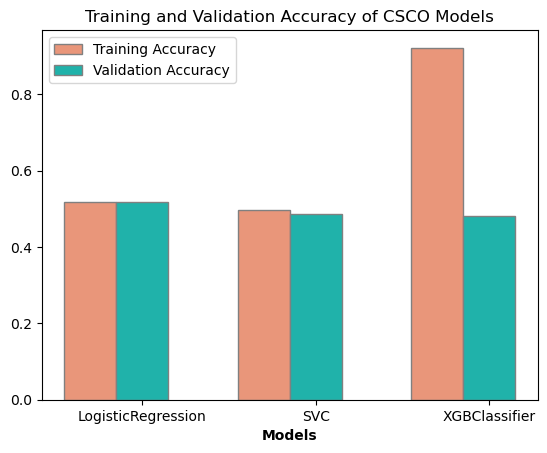

In [17]:
# Model names
models_name = ['LogisticRegression', 'SVC', 'XGBClassifier']

# Training accuracy values
train_acc = [0.517419898371889, 0.4971664995768098, 0.921490019894624]

# Validation accuracy values
val_acc = [0.5168610547667343, 0.4851990365111562, 0.4806668356997971]

# Bar width
barWidth = 0.3

# Set position of bar on X axis
r1 = np.arange(len(train_acc))
r2 = [x + barWidth for x in r1]

# Create blue bars for training accuracy
plt.bar(r1, train_acc, color='darksalmon', width=barWidth, edgecolor='grey', label='Training Accuracy')

# Create red bars for validation accuracy
plt.bar(r2, val_acc, color='lightseagreen', width=barWidth, edgecolor='grey', label='Validation Accuracy')

# Title & Subtitle
plt.title('Training and Validation Accuracy of CSCO Models')
plt.xlabel('Models', fontweight='bold')
plt.xticks([r + barWidth for r in range(len(train_acc))], models_name)

# Create legend & Show graphic
plt.legend()
plt.show()
